In [7]:
# Load packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Import of Feelnc Classifier output
data = pd.read_csv('lncRNA_classes.txt', sep='\t')

# import deg transcript lncRNA
deg_na = pd.read_csv('../9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/Normoxia to Anoxia_lncrna.csv', sep=',')
deg_nr = pd.read_csv('../9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/Normoxia to Reoxygenation_lncrna.csv', sep=',')
deg_ar = pd.read_csv('../9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/Anoxia to Reoxygenation_lncrna.csv', sep=',')
deg = pd.concat([deg_na, deg_nr, deg_ar])

# Import common 33882 lncRNAs
common = pd.read_csv('../6_identify_common_lncRNA/common_lncrna_transcript_id.csv', sep='\t')

In [9]:
# add new column to filter subsets later 
data['subset'] = 'None'
# add subset information to the whole dataframe
data['subset'][data['lncRNA_transcript'].str.lower().isin(common['transcript_id'])] = 'lncRNA'
data['subset'][data['lncRNA_transcript'].str.lower().isin(deg['transcript_id'])] = 'deg lncRNA'
# drop the rows that are not in a subset
data.drop(data[data['subset'] == 'None'].index, inplace=True)

/tmp/ipykernel_15425/1769169812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subset'][data['lncRNA_transcript'].str.lower().isin(common['transcript_id'])] = 'lncRNA'
/tmp/ipykernel_15425/1769169812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subset'][data['lncRNA_transcript'].str.lower().isin(deg['transcript_id'])] = 'deg lncRNA'


In [10]:
num_interaction_partner = data.loc[data['subset'] == 'deg lncRNA']

In [11]:
len(num_interaction_partner['lncRNA_transcript'].drop_duplicates())

2100

In [12]:
num_interaction_partner

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location,subset
0,1,STRG.29214,STRG.29214.1,ccar_ua15-g14201,ccar_ua15-g14201.t1,sense,intergenic,1669,same_strand,upstream,deg lncRNA
57,1,STRG.12225,STRG.12225.2,ccar_ua05-g6016,ccar_ua05-g6016.t1,antisense,intergenic,16718,divergent,upstream,deg lncRNA
58,1,STRG.5756,STRG.5756.1,ccar_ua02-g2784,ccar_ua02-g2784.t1,strand_unknow,intergenic,37115,unknow strand(s),upstream,deg lncRNA
96,1,STRG.32088,STRG.32088.1,ccar_ua16-g15758,ccar_ua16-g15758.t1,antisense,intergenic,5706,divergent,upstream,deg lncRNA
97,0,STRG.32088,STRG.32088.1,ccar_ua16-g15757,ccar_ua16-g15757.t1,antisense,intergenic,7959,convergent,downstream,deg lncRNA
...,...,...,...,...,...,...,...,...,...,...,...
113731,1,STRG.21062,STRG.21062.1,ccar_ua10-g9988,ccar_ua10-g9988.t1,strand_unknow,genic,0,overlapping,exonic,deg lncRNA
113732,0,STRG.21062,STRG.21062.1,ccar_ua10-g9987,ccar_ua10-g9987.t4,strand_unknow,intergenic,3534,unknow strand(s),downstream,deg lncRNA
113733,0,STRG.21062,STRG.21062.1,ccar_ua10-g9987,ccar_ua10-g9987.t1,strand_unknow,intergenic,3534,unknow strand(s),downstream,deg lncRNA
113734,0,STRG.21062,STRG.21062.1,ccar_ua10-g9987,ccar_ua10-g9987.t2,strand_unknow,intergenic,3534,unknow strand(s),downstream,deg lncRNA


In [7]:
# show me the minimum interaction partner transcripts 
num_interaction_partner['lncRNA_transcript'].value_counts().min()

1

In [8]:
# show me the maximum interaction partner transcripts
num_interaction_partner['lncRNA_transcript'].value_counts().max()

27

In [9]:
# show me median interaction partner transcripts
num_interaction_partner['lncRNA_transcript'].value_counts().median()

2.0

In [10]:
num_interaction_partner.loc[num_interaction_partner['isBest'] ==1]

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location,subset
0,1,STRG.29214,STRG.29214.1,ccar_ua15-g14201,ccar_ua15-g14201.t1,sense,intergenic,1669,same_strand,upstream,deg lncRNA
57,1,STRG.12225,STRG.12225.2,ccar_ua05-g6016,ccar_ua05-g6016.t1,antisense,intergenic,16718,divergent,upstream,deg lncRNA
58,1,STRG.5756,STRG.5756.1,ccar_ua02-g2784,ccar_ua02-g2784.t1,strand_unknow,intergenic,37115,unknow strand(s),upstream,deg lncRNA
96,1,STRG.32088,STRG.32088.1,ccar_ua16-g15758,ccar_ua16-g15758.t1,antisense,intergenic,5706,divergent,upstream,deg lncRNA
166,1,STRG.24707,STRG.24707.1,ccar_ua12-g11864,ccar_ua12-g11864.t1,sense,intergenic,34077,same_strand,upstream,deg lncRNA
...,...,...,...,...,...,...,...,...,...,...,...
113510,1,STRG.26557,STRG.26557.1,ccar_ua13-g12944,ccar_ua13-g12944.t2,strand_unknow,intergenic,90771,unknow strand(s),downstream,deg lncRNA
113605,1,STRG.23405,STRG.23405.1,ccar_ua11-g11458,ccar_ua11-g11458.t1.1.6676f666,strand_unknow,intergenic,2054,unknow strand(s),upstream,deg lncRNA
113680,1,STRG.13136,STRG.13136.1,ccar_ua06-g6317,ccar_ua06-g6317.t1,sense,intergenic,49405,same_strand,downstream,deg lncRNA
113689,1,STRG.7273,STRG.7273.1,ccar_ua03-g3444,ccar_ua03-g3444.t1,strand_unknow,intergenic,3367,unknow strand(s),upstream,deg lncRNA


In [29]:
# export the transcript id's of the interaction partners for the subset of deg lncRNAs
num_interaction_partner.to_csv('deg_lncrna_interaction_partners.txt', sep='\t', index=False)

# 1 Number of Interaction partners found

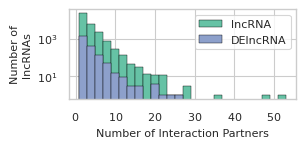

In [11]:
# PLOT: distance of Interaction partner to lncRNA
sns.set_theme(style='whitegrid', palette='colorblind', context='paper', rc={
    'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8, "axes.formatter.use_mathtext": True
})
plt.figure(figsize=((8 / 2.54), (4 / 2.54)))
plt.hist(data['lncRNA_transcript'].value_counts(), color='#66C2A5', edgecolor='black', linewidth=0.3, bins=range(1, data['lncRNA_transcript'].value_counts().max() +1, 2))
plt.hist(data.loc[data['subset'] == 'deg lncRNA','lncRNA_transcript'].value_counts(), color='#8DA0CB', 
        edgecolor='black', linewidth=0.3, bins=range(1,data.loc[data['subset'] == 'deg lncRNA','lncRNA_transcript'].value_counts().max() +1, 2))
plt.legend(['lncRNA', 'DElncRNA'], loc='upper right')
plt.yscale('log')
plt.ylabel('Number of\nlncRNAs')
plt.xlabel('Number of Interaction Partners')
plt.tight_layout()

plt.savefig('lncRNA_interaction_partners.svg')
plt.show()

In [12]:
data.loc[data['subset'] == 'deg lncRNA','lncRNA_transcript'].value_counts().max()


27

# 2 Distance to Interaction Partner

In [13]:
# keep only the best interaction partner'
datab = data.loc[data['isBest'] ==1]

# Adjust the distance based on the location and convert to kb
datab['adjusted_distance_kb'] = datab.apply(lambda x: x['distance']/1000 if x['location'] == 'upstream' else -x['distance']/1000, axis=1)


/tmp/ipykernel_1531/1741332878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['adjusted_distance_kb'] = datab.apply(lambda x: x['distance']/1000 if x['location'] == 'upstream' else -x['distance']/1000, axis=1)


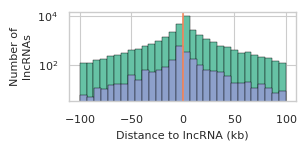

In [14]:
# PLOT: distance of Interaction partner to lncRNA
sns.set_theme(style='whitegrid', palette='colorblind', context='paper', rc={
    'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8, "axes.formatter.use_mathtext": True
})
plt.figure(figsize=((8 / 2.54), (4/ 2.54)))

# Plot histogram with thinner edgecolor and alpha
plt.hist(datab['adjusted_distance_kb'], bins=30, edgecolor='black', linewidth=0.3, color='#66C2A5')
plt.hist(datab.loc[datab['subset'] == 'deg lncRNA', 'adjusted_distance_kb'], bins=30, edgecolor='black', linewidth=0.3, color='#8DA0CB')

plt.xlabel('Distance to lncRNA (kb)')
plt.ylabel('Number of\nlncRNAs')

plt.yscale('log')
# Add labels to the plot
plt.axvline(0, color='#FC8D62', linestyle='-')  # vertical line at x=0

# Display the plot
plt.tight_layout()
plt.savefig('lncRNA_interaction_distance.svg')
plt.show()


In [15]:
data['distance'].max()

99979

# 3 Classes of lncRNA

In [16]:
# remove lncRNAs with unknown strand information
datab = datab.loc[datab['subtype'] != 'unknow strand(s)']
# split df into genic and intergenic lncRNAs information for plotting 
datab_genic = datab.loc[datab['type'] == 'genic']
datab_intergenic = datab.loc[datab['type'] == 'intergenic']
# rename the value 'same_strand' to 'same strand' for better readability
datab_intergenic['subtype'] = datab_intergenic['subtype'].replace('same_strand', 'same strand')
datab_genic['direction'] = datab_genic['direction'].replace('strand_unknow', 'strand unknown')

/tmp/ipykernel_1531/3061571373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab_intergenic['subtype'] = datab_intergenic['subtype'].replace('same_strand', 'same strand')
/tmp/ipykernel_1531/3061571373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab_genic['direction'] = datab_genic['direction'].replace('strand_unknow', 'strand unknown')


# Intergenic

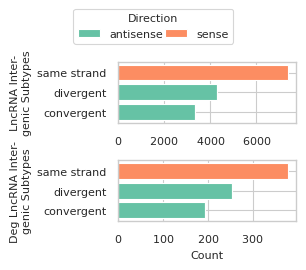

In [17]:
# Compute the counts for the top and bottom plot
counts_top = datab_intergenic.groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)
counts_bottom = datab_intergenic.loc[datab_intergenic['subset'] == 'deg lncRNA'].groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)

# Create a subplot figure with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=((8/2.54), (6/2.54)))  # Adjust height for two plots

# Function to create the bar chart on a given axis
def create_bar_chart(ax, counts, ylabel, xlabel=''):
    sns.set_theme(style='whitegrid', palette='Set2', context='paper', 
                  rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                      'legend.fontsize': 8, 'legend.title_fontsize': 8, 
                      "axes.formatter.use_mathtext": True})

    # Create a color palette for different directions
    palette = sns.color_palette("Set2", len(counts.columns))

    # Create the horizontal bars with color mapping to df['direction']
    bars = []
    for idx, (column, color) in enumerate(zip(counts.columns, palette)):
        bar = ax.barh(counts.index, counts[column], left=counts.iloc[:, :idx].sum(axis=1), label=column, color=color)
        bars.append(bar)

    # Labeling the axes
    ax.set_ylabel(ylabel)  # y-axis label customized per subplot
    ax.set_xlabel(xlabel)  # x-axis label customized per subplot (only for the lower subplot)

# Create the plots with different counts data and custom y-axis labels
create_bar_chart(axes[0], counts_top, 'LncRNA Inter-\ngenic Subtypes')
create_bar_chart(axes[1], counts_bottom, 'Deg LncRNA Inter-\ngenic Subtypes', 'Count')

# Create a single legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Direction", bbox_to_anchor=(0.5, 1.05), loc='center', ncol=3, columnspacing=.2)

# Adjust margins to ensure elements fit well within each subplot
fig.subplots_adjust(left=0.25, right=0.8, top=0.85, hspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust tight_layout to leave space for the legend

# Save the plot
plt.savefig('lncRNA_classes_intergenic_overview.svg', bbox_inches='tight')

# Display the plot
plt.show()


# Genic

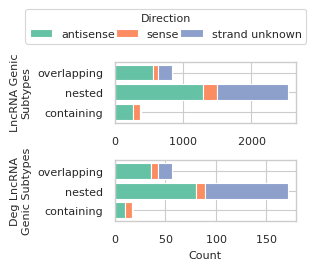

In [18]:
# Compute the counts for the top and bottom plot
counts_top = datab_genic.groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)
counts_bottom = datab_genic.loc[datab_genic['subset'] == 'deg lncRNA'].groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)

# Create a subplot figure with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=((8/2.54), (6/2.54)))  # Adjust height for two plots

# Function to create the bar chart on a given axis
def create_bar_chart(ax, counts, ylabel, xlabel=''):
    sns.set_theme(style='whitegrid', palette='Set2', context='paper', 
                  rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                      'legend.fontsize': 8, 'legend.title_fontsize': 8, 
                      "axes.formatter.use_mathtext": True})

    # Create a color palette for different directions
    palette = sns.color_palette("Set2", len(counts.columns))

    # Create the horizontal bars with color mapping to df['direction']
    bars = []
    for idx, (column, color) in enumerate(zip(counts.columns, palette)):
        bar = ax.barh(counts.index, counts[column], left=counts.iloc[:, :idx].sum(axis=1), label=column, color=color)
        bars.append(bar)

    # Labeling the axes
    ax.set_ylabel(ylabel)  # y-axis label customized per subplot
    ax.set_xlabel(xlabel)  # x-axis label customized per subplot (only for the lower subplot)

# Create the plots with different counts data and custom y-axis labels
create_bar_chart(axes[0], counts_top, 'LncRNA Genic\nSubtypes')
create_bar_chart(axes[1], counts_bottom, 'Deg LncRNA\nGenic Subtypes', 'Count')

# Create a single legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Direction", bbox_to_anchor=(0.54, 1.05), loc='center', ncol=3, columnspacing=.1)

# Adjust margins to ensure elements fit well within each subplot
fig.subplots_adjust(left=0.25, right=0.8, top=0.8, hspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust tight_layout to leave space for the legend

# Save the plot
plt.savefig('lncRNA_classes_genic_overview.svg', bbox_inches='tight')

# Display the plot
plt.show()


# Types of lncRNA

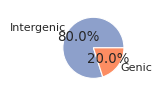

In [19]:
# Plot the Pie chart
sns.set_theme(style='whitegrid', palette='Set2', context='paper', 
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                  'legend.fontsize': 8, 'legend.title_fontsize': 8, 
                  "axes.formatter.use_mathtext": True})
plt.figure(figsize=((4/2.54), (4/2.54)))
plt.pie(datab['type'].value_counts(), autopct='%1.1f%%', 
        labels=['Intergenic', 'Genic'], colors=['#8DA0CB', '#FC8D62'])
# Display the plot
plt.tight_layout()
plt.savefig('lncRNA_classes_venn.svg')
plt.show()

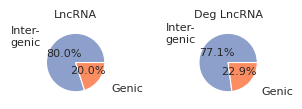

In [20]:
# Set theme for Seaborn plots
sns.set_theme(style='whitegrid', palette='Set2', context='paper',
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8,
                  'legend.fontsize': 8, 'legend.title_fontsize': 8,
                  "axes.formatter.use_mathtext": True})

# Create a figure with 2 subplots
fig = plt.figure(figsize=((10 / 2.54), (6 / 2.54)))

# Add the pie chart subplot
ax1 = fig.add_subplot(1, 3, 1)
ax1.pie(datab['type'].value_counts(), autopct='%1.1f%%',
        labels=['Inter-\ngenic', 'Genic'], colors=['#8DA0CB', '#FC8D62'], 
        labeldistance=1.5, pctdistance=0.5, textprops={'fontsize': 8})
ax1.set_title("LncRNA", fontsize=8)

# Add the second pie chart subplot
ax2 = fig.add_subplot(1, 3, 2)
ax2.pie(datab.loc[datab['subset'] == 'deg lncRNA', 'type'].value_counts(), autopct='%1.1f%%',
        labels=['Inter-\ngenic', 'Genic'], colors=['#8DA0CB', '#FC8D62'], 
        labeldistance=1.5, pctdistance=0.5, textprops={'fontsize': 8})
ax2.set_title('Deg LncRNA', fontsize=8)

# Adjust layout to prevent overlap and remove white space
plt.tight_layout()
plt.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.1)

# Save the plot with tight bounding box
plt.savefig('lncRNA_classes_overview.svg', bbox_inches='tight')

# Display the plot
plt.show()


# Match Partner RNA gene ids with DEG up and down for GO term analysis

In [21]:
import pandas as pd

# Define the file paths
file_paths = {
    'na_up': '../9_1_dea_lncrna/9_1_2_deg_geneid/deg_data/deg_normoxia_to_anoxia_up.csv',
    'na_down': '../9_1_dea_lncrna/9_1_2_deg_geneid/deg_data/deg_normoxia_to_anoxia_down.csv',
    'nr_up': '../9_1_dea_lncrna/9_1_2_deg_geneid/deg_data/deg_normoxia_to_reoxygenation_up.csv',
    'nr_down': '../9_1_dea_lncrna/9_1_2_deg_geneid/deg_data/deg_normoxia_to_reoxygenation_down.csv',
    'ar_up': '../9_1_dea_lncrna/9_1_2_deg_geneid/deg_data/deg_anoxia_to_reoxygenation_up.csv',
    'ar_down': '../9_1_dea_lncrna/9_1_2_deg_geneid/deg_data/deg_anoxia_to_reoxygenation_down.csv'
}

# Define conditions
conditions = ['na', 'nr', 'ar']

# Read the data files
dfs = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Process each condition
for condition in conditions:
    # Concatenate `up` and `down` DataFrames
    combined_df = pd.concat([dfs[f'{condition}_up'], dfs[f'{condition}_down']])
    
    # Apply the `.loc()` filtering
    filtered_df = combined_df.loc[combined_df['gene_id'].isin(datab['partnerRNA_gene'])]
    
    # Export to CSV file
    filtered_df.to_csv(f'GO_analysis_input/deg_{condition}_go.csv', index=False)


# extract all deg lndRNA combined into one file

In [22]:
deglncrna = datab.loc[datab['lncRNA_transcript'].str.lower().isin(deg['transcript_id'])]

In [23]:
# rename column 
df = datab.rename(columns={'partnerRNA_gene': 'gene_id'})
df['gene_id'].to_csv('GO_analysis_input/lncRNA_deg_geneid.csv', index=False)

In [24]:
df

,isBest,lncRNA_gene,lncRNA_transcript,gene_id,partnerRNA_transcript,direction,type,distance,subtype,location,subset,adjusted_distance_kb
0,1,STRG.29214,STRG.29214.1,ccar_ua15-g14201,ccar_ua15-g14201.t1,sense,intergenic,1669,same_strand,upstream,deg lncRNA,1.669
7,1,STRG.19836,STRG.19836.1,ccar_ua09-g9494,ccar_ua09-g9494.t1,antisense,intergenic,20292,divergent,upstream,lncRNA,20.292
9,1,STRG.35912,STRG.35912.1,ccar_ua18-g17602,ccar_ua18-g17602.t1,antisense,intergenic,1789,divergent,upstream,lncRNA,1.789
19,1,STRG.9925,STRG.9925.2,ccar_ua04-g4770,ccar_ua04-g4770.t1,antisense,intergenic,54575,convergent,downstream,lncRNA,-54.575
26,1,STRG.14536,STRG.14536.1,ccar_ua07-g6990,ccar_ua07-g6990.t1,antisense,intergenic,4413,convergent,downstream,lncRNA,-4.413
...,...,...,...,...,...,...,...,...,...,...,...,...
113702,1,STRG.63775,STRG.63775.2,ccar_ub10-g32472,ccar_ub10-g32472.t1,sense,intergenic,71325,same_strand,downstream,lncRNA,-71.325
113710,1,STRG.26917,STRG.26917.1,ccar_ua13-g13129,ccar_ua13-g13129.t1,sense,intergenic,73450,same_strand,downstream,lncRNA,-73.450
113715,1,STRG.77336,STRG.77336.4,ccar_ub18-g39900,ccar_ub18-g39900.t1.1.6676f68a,antisense,genic,0,overlapping,exonic,lncRNA,0.000
113731,1,STRG.21062,STRG.21062.1,ccar_ua10-g9988,ccar_ua10-g9988.t1,strand_unknow,genic,0,overlapping,exonic,deg lncRNA,0.000
